## Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 제출 방법: GitHub (11/11 자정까지)
* 파일 이름: A4-학번-이름(영어로).iphynb 형식으로 (예: A4-13403-999-jiyoon.iphynb)

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



### Q1: 긍정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

In [11]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [12]:
#naver_ratings.txt 파일은 탭을 기준으로 3개의 column을 가짐. 이를 csv 파일로 변환함.
data = pd.read_csv("naver_ratings.csv")

#부정적 평가와 긍정적 평가 데이터 생성
positive_ratings = data[data.label == 1]
negative_ratings = data[data.label == 0]

#긍정적 평가 1000개 random choice
th_positive = positive_ratings.sample(1000)

# 긍정적 평가 리뷰 documnet들의 list 생성
positive_docs = list(th_positive['document'])

#각 document들의 품사 tag 생성 (형용사-VA)
tagger = Komoran()
tagged_docs = [tagger.pos(doc) for doc in positive_docs]



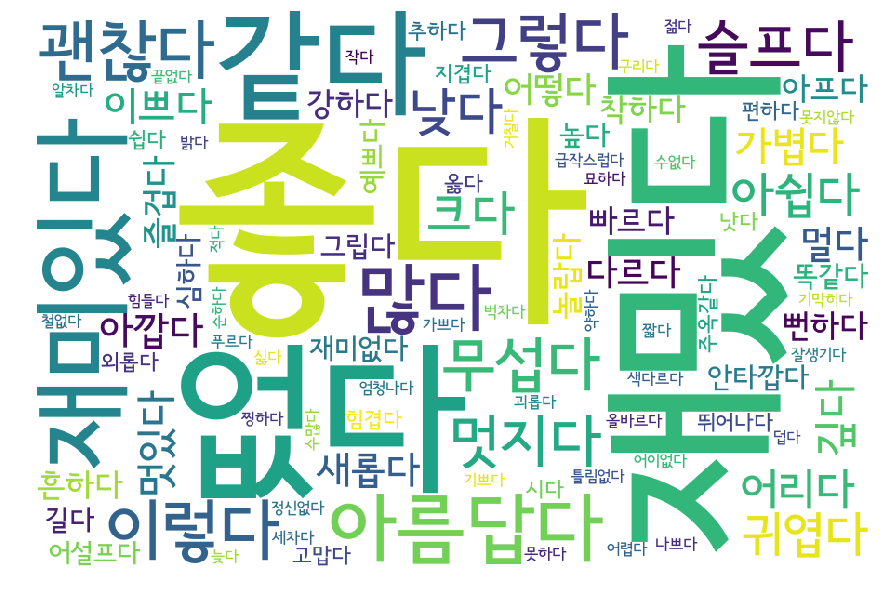

In [13]:
#형용사(VA) list 생성 및 카운트 하기
va_list = []
for doc in tagged_docs:
    for word,tag in doc:
        if tag == 'VA':
            va_list.append(word+"다")
va_counts = Counter(va_list)
va_counts = va_counts.most_common()

#va_counts와 같은 tuple의 list를 cloud.fit_words()에 바로 넣으면 오류 발생 --> 딕셔너리 형태로 변환
va_dict = {}
for key, value in va_counts:
    va_dict[key] = value
va_dict

#wordcloud 만들기
cloud = WordCloud(width=900, height=600, 
                  font_path='‪C:\Windows\Fonts\seoulnamsanB.ttf',
                  background_color='white')
cloud = cloud.fit_words(va_dict)
plt.figure(figsize=(15, 20)) 
plt.axis('off') 
plt.imshow(cloud)
plt.show()

### Q2: 부정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

In [14]:
#부정적 평가 1000개 random choice
th_negative = negative_ratings.sample(1000)

# 긍정적 평가 리뷰 documnet들의 list 생성
negative_docs = list(th_negative['document'])

#각 document들의 품사 tag 생성 (형용사-VA)
tagger = Komoran()
ne_tagged_docs = [tagger.pos(doc) for doc in negative_docs]

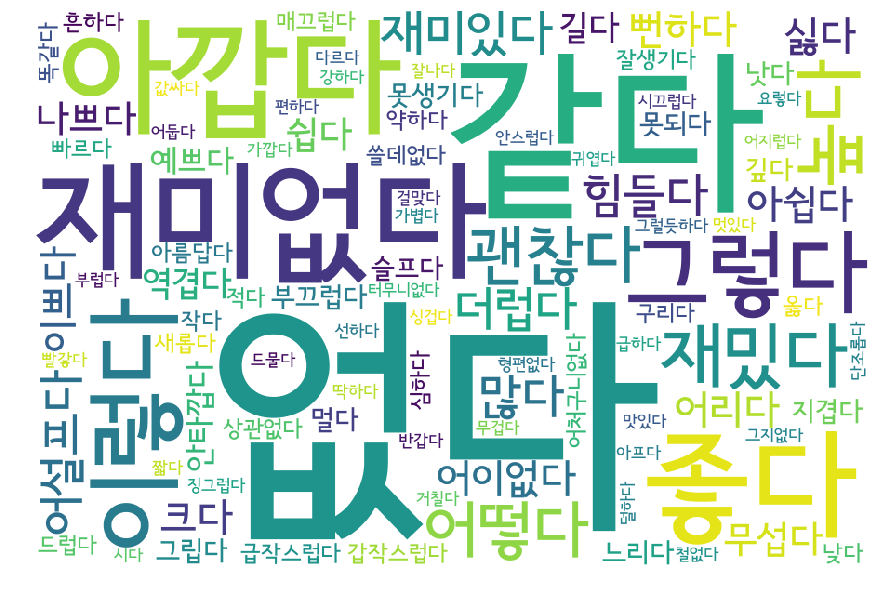

In [15]:
#형용사(VA) list 생성 및 카운트 하기
ne_va_list = []
for doc in ne_tagged_docs:
    for word,tag in doc:
        if tag == 'VA':
            ne_va_list.append(word+"다")
ne_va_counts = Counter(ne_va_list)
ne_va_counts = ne_va_counts.most_common()

#va_counts와 같은 tuple의 list를 cloud.fit_words()에 바로 넣으면 오류 발생 --> 딕셔너리 형태로 변환
ne_va_dict = {}
for key, value in ne_va_counts:
    ne_va_dict[key] = value

#wordcloud 만들기
cloud = WordCloud(width=900, height=600, 
                  font_path='‪C:\Windows\Fonts\seoulnamsanB.ttf',
                  background_color='white')
cloud = cloud.fit_words(ne_va_dict)
plt.figure(figsize=(15, 20)) 
plt.axis('off') 
plt.imshow(cloud)
plt.show()